## Chapter 3. Question 15
## This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

In [29]:
!pip install ISLP

In [30]:
from ISLP import load_data
boston = load_data('Boston')
print(boston.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


In [31]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

### (a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically signifcant association between the predictor and the response? Create some plots to back up your assertions.


The response(crim) has significant association with the following predictors:
- zn
- indus
- nox
- rm
- age
- dis
- rad
- tax
- ptratio
- lstat
- medv


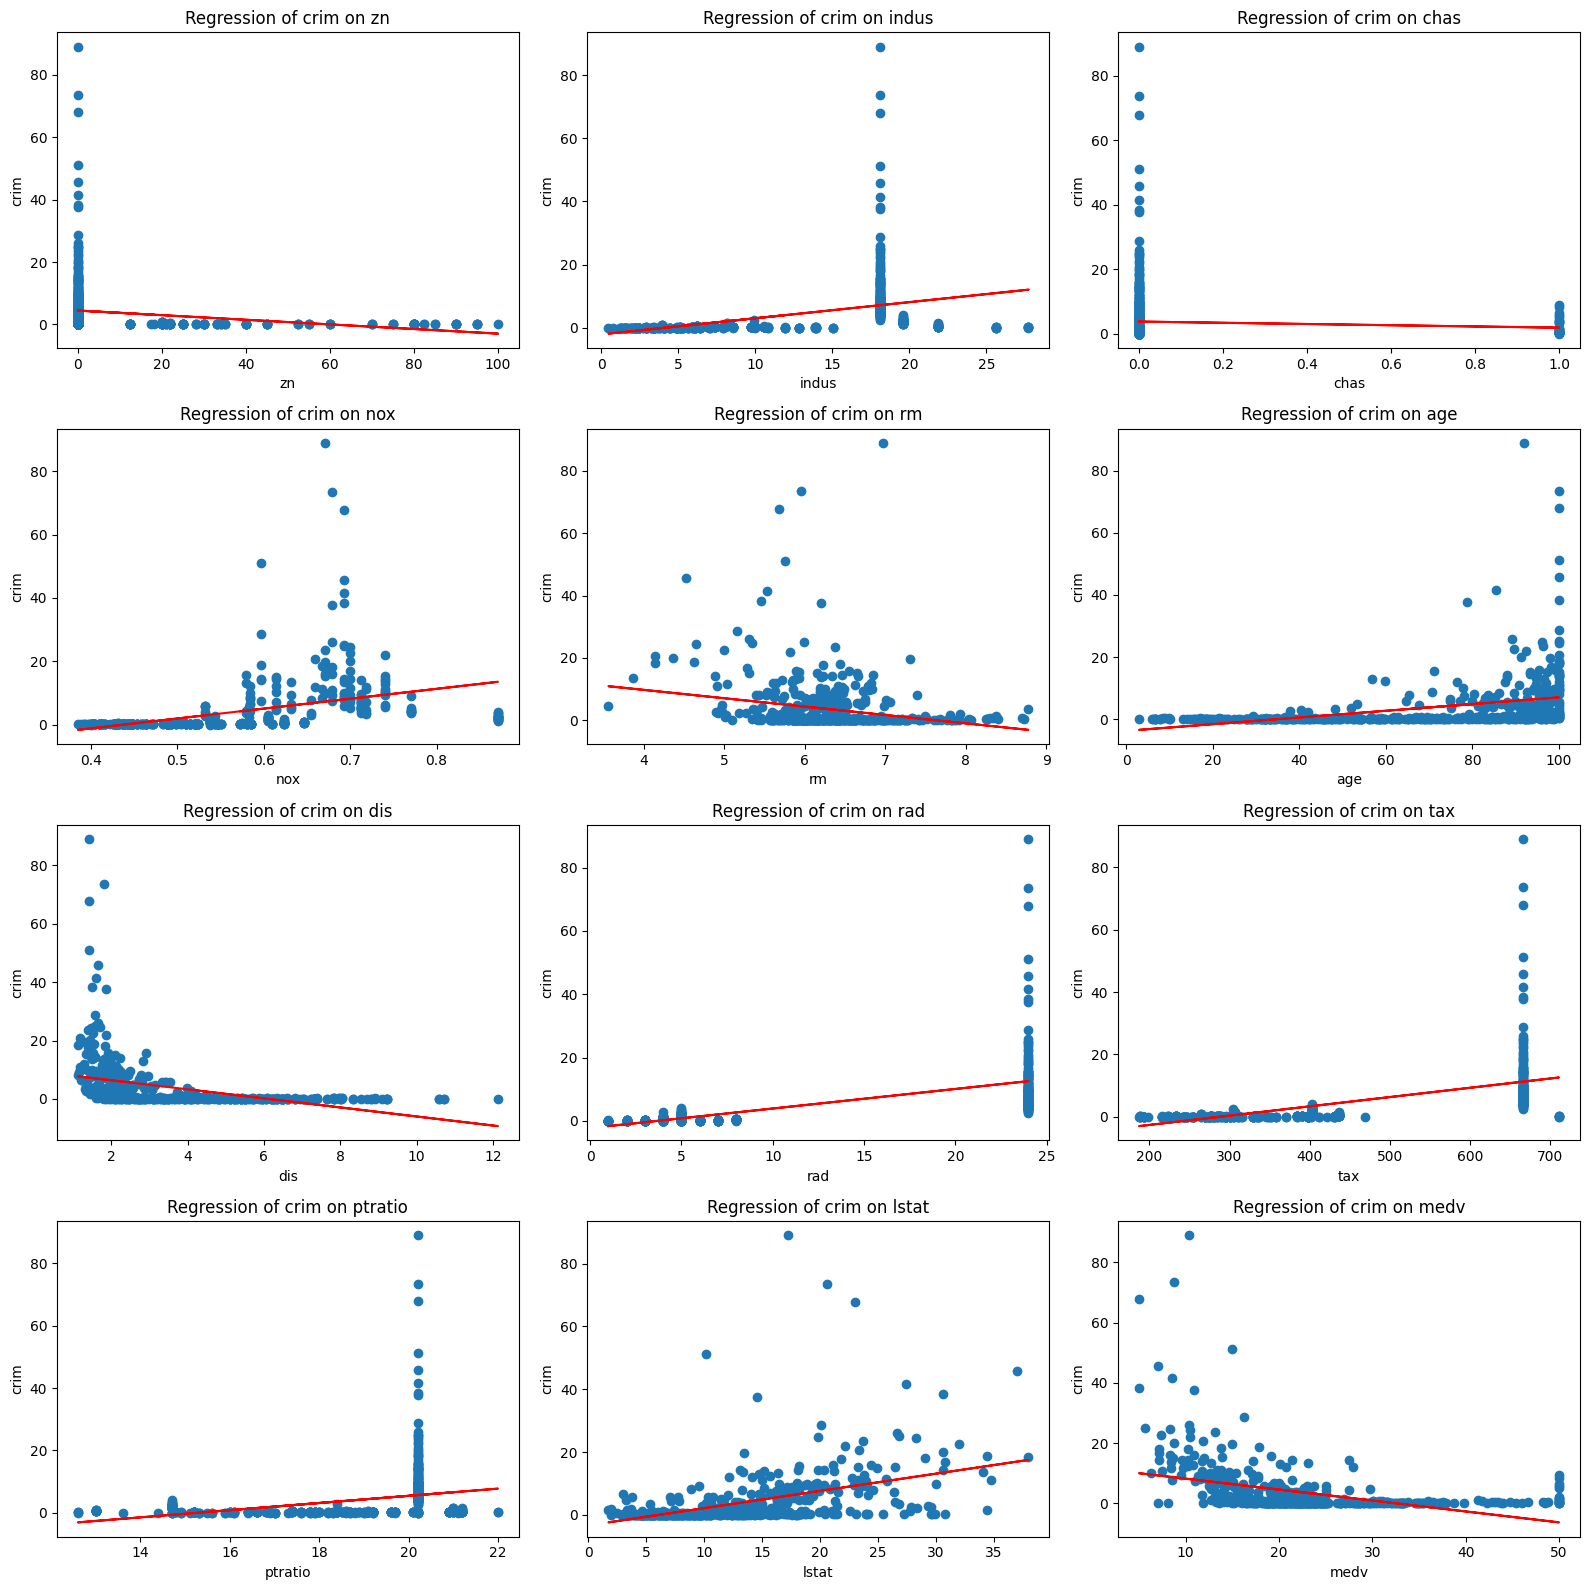

In [32]:
predictors = list(boston.columns)
predictors.remove('crim')

n_cols = 3
n_rows = (len(predictors) + n_cols - 1) // n_cols  # Calculate the number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()  # Flatten the axes array to easily access each subplot

association = []
for i, predictor in enumerate(predictors):
    X = boston[[predictor]]
    y = boston['crim']

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    # Check for statistical significance
    if model.pvalues[predictor] < 0.01:
        association.append(predictor)

    # Create scatter plot and regression line in the appropriate subplot
    axes[i].scatter(boston[predictor], y, label='Data points')
    axes[i].plot(boston[predictor], model.predict(X), color='red', label='Regression line')
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('crim')
    axes[i].set_title(f"Regression of crim on {predictor}")

print("The response(crim) has significant association with the following predictors:")
for predictor in association:
    print(f"- {predictor}")

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

### (b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [33]:
X = boston.drop('crim', axis=1)
y = boston['crim']

X = sm.add_constant(X)
multi_model = sm.OLS(y, X).fit()
print(multi_model.summary())

significant_predictors = []
for predictor, p_value in multi_model.pvalues.items():
  if p_value < 0.05 and predictor != 'const':
    significant_predictors.append(predictor)


print("\nPredictors for which we can reject the null hypothesis (H0: βj = 0):")
for predictor in significant_predictors:
  print(f"- {predictor}")


                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           2.03e-56
Time:                        11:38:12   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082      1.946      0.0

### (c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coeffcients from (a) on the x-axis, and the multiple regression coefcients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coeffcient in a simple linear regression model is shown on the x-axis, and its coefcient estimate in the multiple linear regression model is shown on the y-axis.

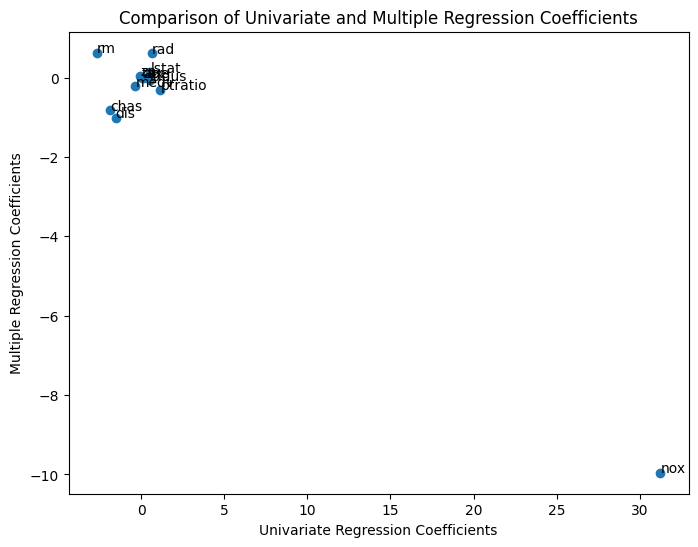

In [34]:
# Extract coefficients from simple linear regression models (part a)
univariate_coefficients = {}
for predictor in predictors:
  X = boston[[predictor]]
  y = boston['crim']

  X = sm.add_constant(X)
  model = sm.OLS(y, X).fit()
  univariate_coefficients[predictor] = model.params[predictor]

# Extract coefficients from multiple linear regression model (part b)
multiple_coefficients = multi_model.params.drop('const')

# Create a list of predictor names and their corresponding coefficients
x_values = [univariate_coefficients[predictor] for predictor in predictors]
y_values = [multiple_coefficients[predictor] for predictor in predictors]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values)
plt.xlabel("Univariate Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")
plt.title("Comparison of Univariate and Multiple Regression Coefficients")

# Add labels for each point (predictor name)
for i, predictor in enumerate(predictors):
  plt.annotate(predictor, (x_values[i], y_values[i]))

plt.show()

### (d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
$$
Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \varepsilon
$$


Predictors with evidence of non-linear association:
- indus
- nox
- age
- dis
- ptratio
- medv



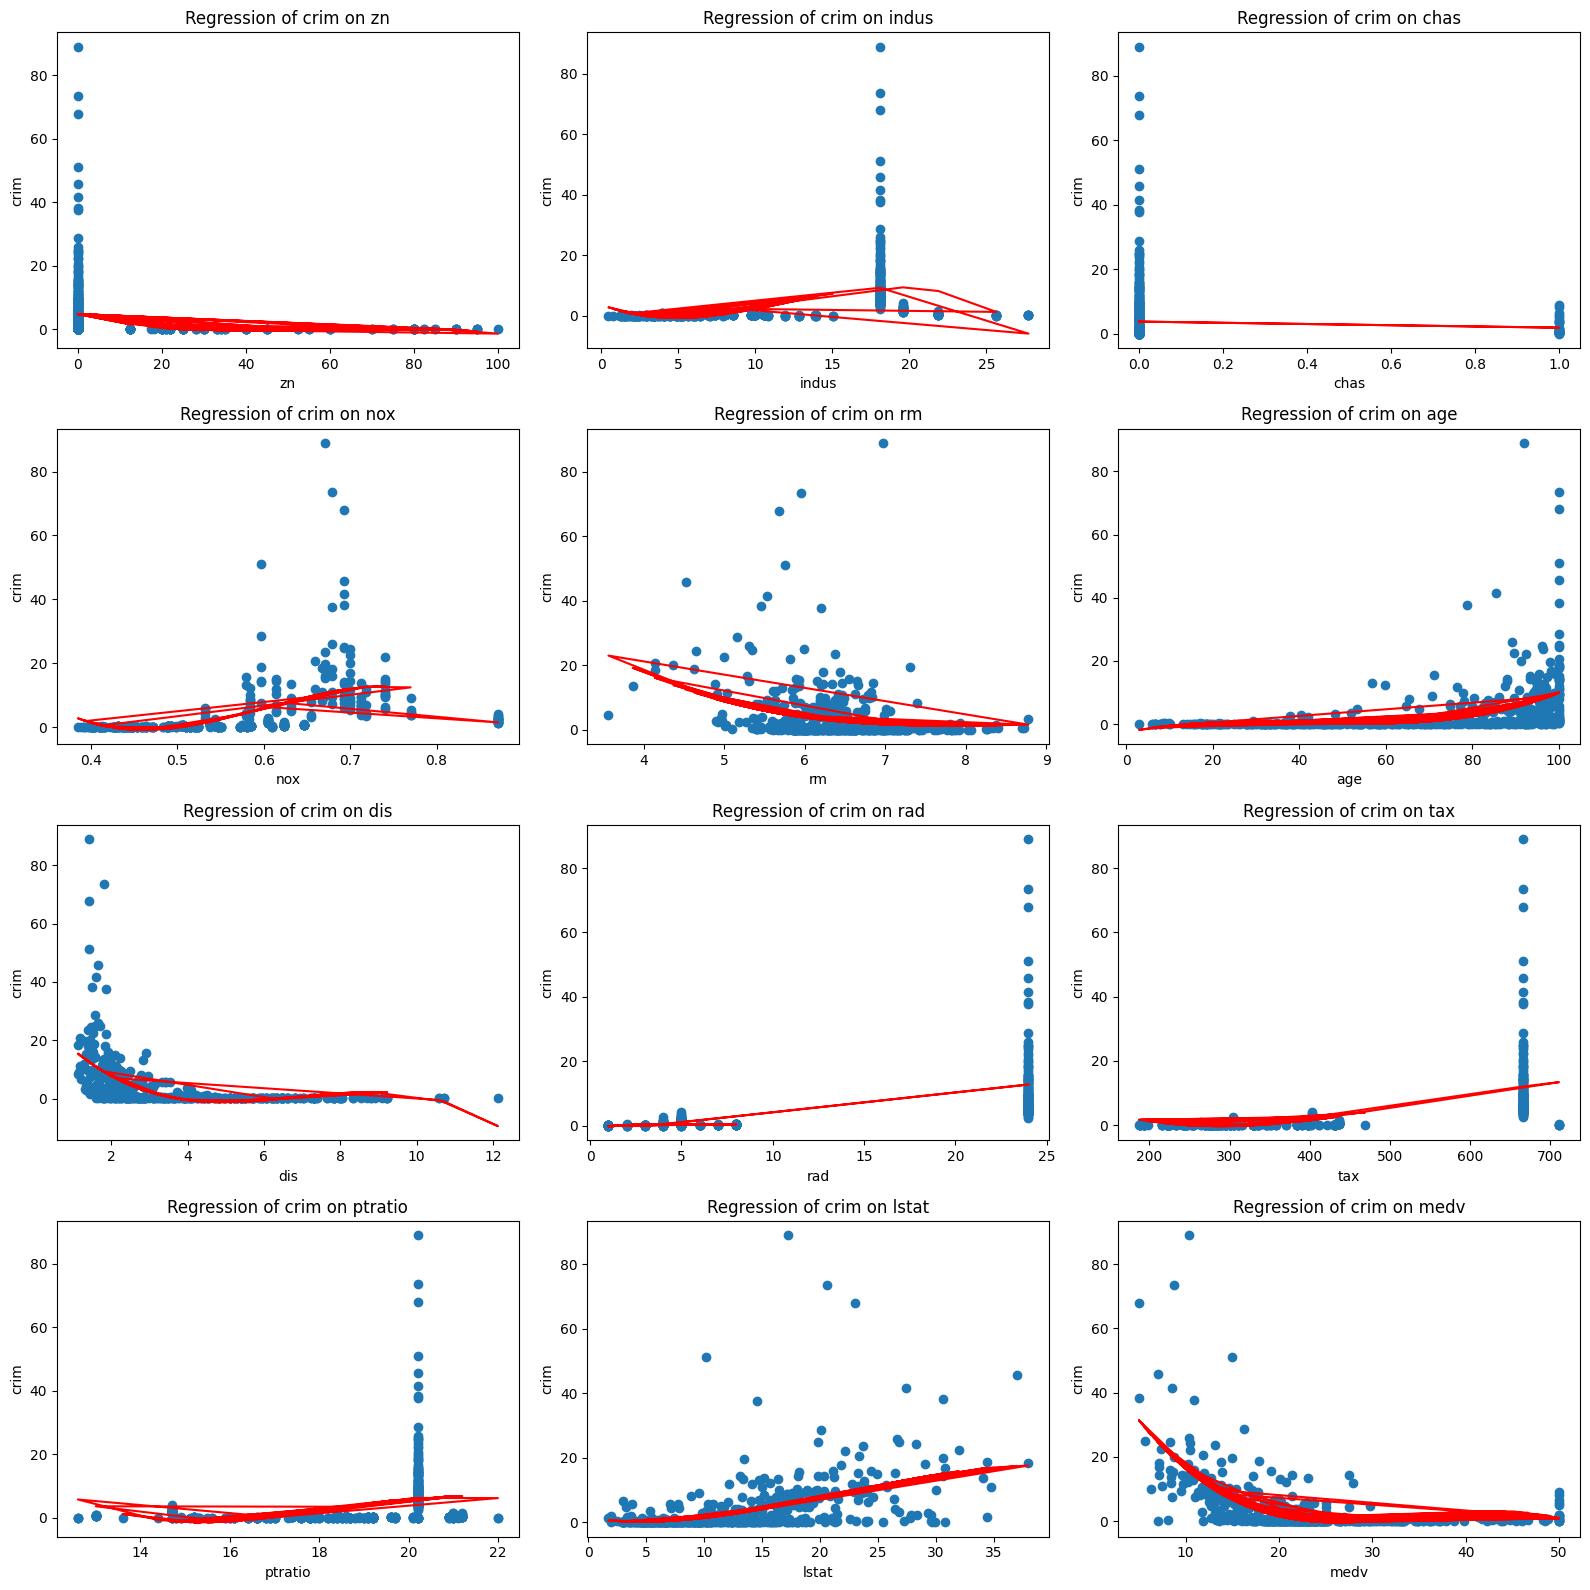

In [35]:
n_cols = 3
n_rows = (len(predictors) + n_cols - 1) // n_cols  # Calculate the number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()  # Flatten the axes array to easily access each subplot

nonlinear_association = []
for i, predictor in enumerate(predictors):
    X_poly = pd.DataFrame({
        'X': boston[predictor],
        'X2': boston[predictor] ** 2,
        'X3': boston[predictor] ** 3
    })
    y = boston['crim']
    X_poly = sm.add_constant(X_poly)

    nonlinear_model = sm.OLS(y, X_poly).fit()

    axes[i].scatter(boston[predictor], y, label='Data points')
    axes[i].plot(boston[predictor], nonlinear_model.predict(X_poly), color='red', label='Regression line')
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('crim')
    axes[i].set_title(f"Regression of crim on {predictor}")

    if nonlinear_model.pvalues['X2'] < 0.05 or nonlinear_model.pvalues['X3'] < 0.05:
        nonlinear_association.append(predictor)

print("\nPredictors with evidence of non-linear association:")
for predictor in nonlinear_association:
    print(f"- {predictor}")
print()
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()